In [1]:
import pandas as pd
import torch
import sys
import cv2
import numpy as np
from tqdm import tqdm

In [2]:
# sys.path.remove('/mnt/DATA2/congvm/Workspace/ABAW2')
from utils.datamodule import get_transform, AffWildDataModule
from utils.netmodule import ArcFaceIRes50

In [7]:
data_module = AffWildDataModule(
    data_dir="/home/lab/congvm/Affwild2",
    backbone_name="vggresnet50",
    mode="static",
    batch_size=32,
)
data_module.setup(stage="fit")
val_dataloader = data_module.val_dataloader()


> Get ImageNet transform funcs


100%|██████████| 70/70 [00:00<00:00, 160.28it/s]


In [ ]:
for batch in val_dataloader:
    break
print(batch['img_arr'].shape)
print(batch['img_path'])

In [9]:
model = ArcFaceIRes50()
_ = model.eval()
_ = model.to('cuda:0')

<All keys matched successfully>


In [ ]:
val_dataloader.__len__

In [10]:
y_emb_results = []
for batch in tqdm(val_dataloader):
    batch["img_arr"] = batch["img_arr"].to("cuda:0")
    with torch.no_grad():
        y_emb = model(batch["img_arr"])
    y_emb_results.append(y_emb.detach().cpu().numpy())


 56%|█████▋    | 4939/8767 [02:23<01:51, 34.32it/s]


Traceback (most recent call last):
  File "/mnt/DATA2/congvm/miniconda3/lib/python3.9/multiprocessing/queues.py", line 251, in _feed
    send_bytes(obj)
  File "/mnt/DATA2/congvm/miniconda3/lib/python3.9/multiprocessing/connection.py", line 205, in send_bytes
    self._send_bytes(m[offset:offset + size])


KeyboardInterrupt: 

In [22]:
y_emb_results_ = np.concatenate(y_emb_results)
y_emb_results_.shape

y_emb_selected_indices = np.random.choice(range(len(y_emb_results_)), 5000)
y_emb_selected_results = y_emb_results_[y_emb_selected_indices]
y_emb_selected_results.shape


(5000, 512)

Text(0.5, 1.0, 'L2Normed Facial embeddings with ONNX weights')

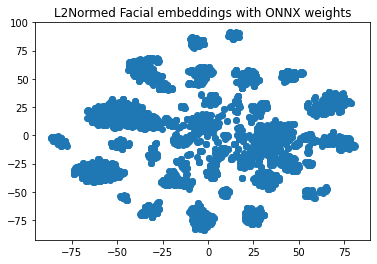

In [23]:
from tqdm import tqdm
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

feats_X_embedded = TSNE(n_components=2, init="random").fit_transform(
    y_emb_selected_results
)
plt.scatter(feats_X_embedded[:, 0], feats_X_embedded[:, 1])
plt.title("L2Normed Facial embeddings with ONNX weights")
